In [ ]:
#Pencil Sketch Project

#setp1:convert intio Grayscale or Guassian Blur
#step2:division Image
#Step3:Lookup table(LUT)

In [ ]:
import numpy as np
import cv2

In [ ]:
img=cv2.imread('./images/ps/friends.jpg')

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

![image](images/ps/pencil_sketch_flow.PNG)

In [ ]:
def pencil_sketch(img,ksize,gamma):
    #step1
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #step2
    blur=cv2.GaussianBlur(gray,(ksize,ksize),0)
    #step3
    division_img=cv2.divide(gray,blur,scale=256)
    #step4:adjusting gamma factor
    gamma=gamma

    if gamma==0:
        gamma=0.01
    elif gamma<0:
        raise Exception('can not be negative','gamma value cannot be negative number')
    elif gamma>1:
        raise Exception('can not be gretaer than one','gamma value cannot be greater than one')
        

    inverse_gamma=1/gamma

    lut=np.array([(((i/255)**inverse_gamma))*255 for i in range(0,256)])

    pencil_sketch_img=cv2.LUT(division_img.astype('uint8'),lut.astype('uint8'))

    return pencil_sketch_img

In [ ]:
pimag=pencil_sketch(img,7,0.3)

cv2.imshow('img',pimag)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#GUI for Pencil Sketch

In [ ]:
image=cv2.imread('./images/ps/friends.jpg')
cv2.namedWindow('ControlPanel')
cv2.createTrackbar('ksize','ControlPanel',1,100,(lambda x:None))
cv2.createTrackbar('gamma','ControlPanel',1,100,(lambda x:None))

while True:
    k=cv2.getTrackbarPos('ksize','ControlPanel')
    k=2*k+1
    g=cv2.getTrackbarPos('gamma','ControlPanel')
    g=g/100
    pencil_img=pencil_sketch(image,k,g)


    cv2.imshow('orginal',pencil_img)
    if cv2.waitKey(1)==27:
        break
cv2.destroyAllWindows()

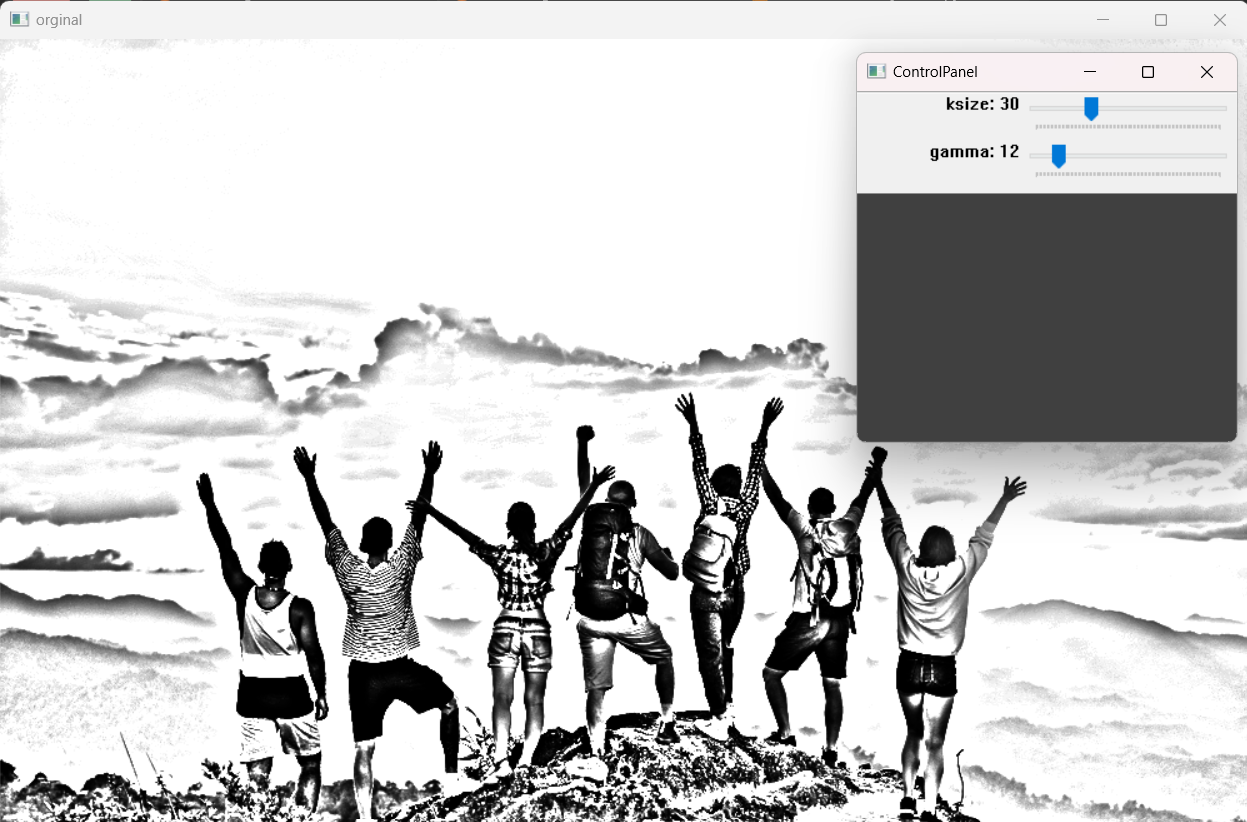